<a href="https://colab.research.google.com/github/RoyElkabetz/Tensor-Networks-Simple-Update/blob/main/univeral_tensor_network_paper__reconstruction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
## uncomment only if running from google.colab
# clone the git reposetory
!git clone https://github.com/RoyElkabetz/Tensor-Networks-Simple-Update
# add path to .py files for import
import sys
sys.path.insert(1, "/content/Tensor-Networks-Simple-Update/src")

fatal: destination path 'Tensor-Networks-Simple-Update' already exists and is not an empty directory.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from TensorNetwork import TensorNetwork
import SimpleUpdate as su

np.random.seed(216)

In [4]:
# Pauli matrices
pauli_x = np.array([[0, 1],
                    [1, 0]])
pauli_y = np.array([[0, -1j],
                    [1j, 0]])
pauli_z = np.array([[1, 0],
                    [0, -1]])
s_i = [pauli_x / 2., pauli_y / 2., pauli_z / 2.]
s_j = [pauli_x / 2., pauli_y / 2., pauli_z / 2.]
s_k = [pauli_x / 2.]

# Infinite Chain Tensor-Network Simple-Update Simulation

In [5]:
# The Tensor Network structure matrix
chain_structure_matrix = np.array([[1, 2],
                                  [1, 2]])

# Simple-Update parameters
d_max_chain = [2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 60]
error = 1e-6
max_iterations = 200
chain_energy = []
j_ij_chain = [1., 1.]
dts = [0.1, 0.01, 0.001, 0.0001, 0.00001]
h_k = 0.


# Run
for d_max in d_max_chain:
    chain = TensorNetwork(structure_matrix=chain_structure_matrix, virtual_size=2)
    chain_su = su.SimpleUpdate(tensor_network=chain, 
                               dts=dts, 
                               j_ij=j_ij_chain, 
                               h_k=h_k, 
                               s_i=s_i, 
                               s_j=s_j, 
                               s_k=s_k, 
                               d_max=d_max, 
                               max_iterations=max_iterations, 
                               convergence_error=error, 
                               log_energy=True,
                               print_process=False)
    chain_su.run()
    energy = chain_su.energy_per_site()
    print(f'| D max: {d_max} | Chain Energy: {energy}\n')
    chain_energy.append(energy)

Simple Update converged. final error is 0.0000000375

| D max: 2 | Chain Energy: -0.4278841718306421

Simple Update converged. final error is 0.0000001064

| D max: 3 | Chain Energy: -0.3406594961217396

Simple Update converged. final error is 0.0000000281

| D max: 4 | Chain Energy: -0.44103661802110183

Simple Update converged. final error is 0.0000000348

| D max: 5 | Chain Energy: -0.43121505975684027

Simple Update converged. final error is 0.0000000283

| D max: 6 | Chain Energy: -0.4424532493015172

Simple Update converged. final error is 0.0000000503

| D max: 7 | Chain Energy: -0.43784994592428106

Simple Update converged. final error is 0.0000000261

| D max: 8 | Chain Energy: -0.44273077383784887

Simple Update converged. final error is 0.0000000201

| D max: 9 | Chain Energy: -0.44146245156917496

Simple Update converged. final error is 0.0000000364

| D max: 10 | Chain Energy: -0.44285475081279935

Simple Update converged. final error is 0.0000000955

| D max: 20 | Chain E

# Infinite PEPS Tensor-Network Simple-Update Simulation

In [8]:
# The Tensor Network structure matrix
peps_structure_matrix = np.array([[1, 2, 3, 4, 0, 0, 0, 0],
                                  [1, 2, 0, 0, 3, 4, 0, 0],
                                  [0, 0, 1, 2, 0, 0, 3, 4,],
                                  [0, 0, 0, 0, 1, 2, 3, 4]])
# Simple-Update parameters
d_max_peps = [2, 3, 4, 5, 6]
error = 1e-6
max_iterations = 200
peps_energy = []
j_ij_peps = [1.] * 8
dts = [0.1, 0.01, 0.001, 0.0001, 0.00001]
h_k = 0.


# Run
for d_max in d_max_peps:
    peps = TensorNetwork(structure_matrix=peps_structure_matrix, virtual_size=2)
    peps_su = su.SimpleUpdate(tensor_network=peps, 
                              dts=dts, 
                              j_ij=j_ij_peps, 
                              h_k=h_k, 
                              s_i=s_i, 
                              s_j=s_j, 
                              s_k=s_k, 
                              d_max=d_max, 
                              max_iterations=max_iterations, 
                              convergence_error=error, 
                              log_energy=True,
                              print_process=True)
    peps_su.run()
    energy = peps_su.energy_per_site()
    print(f'| D max: {d_max} | PEPS Energy: {energy}\n')
    peps_energy.append(energy)

| dt 0.100000 |    20/  200 iteration | averaged error 0.0004757168 | energy per-site -0.628192 | time 0.34 sec
| dt 0.100000 |    40/  200 iteration | averaged error 0.0000014968 | energy per-site -0.628548 | time 0.36 sec
| dt 0.100000 |    60/  200 iteration | averaged error 0.0000000047 | energy per-site -0.628548 | time 0.34 sec
| dt 0.010000 |    20/  200 iteration | averaged error 0.0001808926 | energy per-site -0.648125 | time 0.35 sec
| dt 0.010000 |    40/  200 iteration | averaged error 0.0000923876 | energy per-site -0.648309 | time 0.33 sec
| dt 0.010000 |    60/  200 iteration | averaged error 0.0000472957 | energy per-site -0.648364 | time 0.34 sec
| dt 0.010000 |    80/  200 iteration | averaged error 0.0000244788 | energy per-site -0.648382 | time 0.33 sec
| dt 0.010000 |   100/  200 iteration | averaged error 0.0000131272 | energy per-site -0.648388 | time 0.35 sec
| dt 0.010000 |   120/  200 iteration | averaged error 0.0000070600 | energy per-site -0.648391 | time 0

# Infinite Star Tensor-Network Simple-Update Simulation

In [ ]:
# The Tensor Network structure matrix
star_structure_matrix = np.array([[1, 2, 3, 0, 0, 0, 0, 0, 0],
                                  [1, 0, 0, 2, 3, 0, 0, 0, 0],
                                  [0, 1, 0, 2, 0, 3, 0, 0, 0],
                                  [0, 0, 0, 0, 0, 1, 2, 3, 0],
                                  [0, 0, 0, 0, 1, 0, 2, 0, 3],
                                  [0, 0, 1, 0, 0, 0, 0, 2, 3]])
# Simple-Update parameters
d_max_star = [2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30]
error = 1e-6
max_iterations = 200
star_energy = []
j_ij_star = [1, 1, 0.05, 1, 0.05, 0.05, 1, 1, 1]
dts = [0.1, 0.01, 0.001, 0.0001, 0.00001]
h_k = 0.


# Run
for d_max in d_max_star:
    star = TensorNetwork(structure_matrix=star_structure_matrix, virtual_size=2)
    star_su = su.SimpleUpdate(tensor_network=star, 
                              dts=dts, 
                              j_ij=j_ij_star, 
                              h_k=h_k, 
                              s_i=s_i, 
                              s_j=s_j, 
                              s_k=s_k, 
                              d_max=d_max, 
                              max_iterations=max_iterations, 
                              convergence_error=error, 
                              log_energy=True,
                              print_process=True)
    star_su.run()
    energy = star_su.energy_per_site()
    print(f'| D max: {d_max} | Star Energy: {energy}\n')
    star_energy.append(energy)

# Infinite Cube Tensor-Network Simple-Update Simulation

In [ ]:
# The Tensor Network structure matrix
cube_structure_matrix = np.array([[1, 2, 3, 4, 5, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                  [1, 2, 0, 0, 0, 0, 3, 4, 5, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                  [0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 3, 4, 5, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                  [0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 3, 4, 0, 0, 5, 6, 0, 0, 0, 0, 0, 0, 0, 0],
                                  [0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 5, 6, 0, 0, 0, 0],
                                  [0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 3, 4, 0, 0, 5, 6, 0, 0],
                                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 3, 4, 5, 6],
                                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 3, 4, 0, 0, 5, 6]])

# Simple-Update parameters
d_max_cube = [2, 3, 4, 5]
error = 1e-6
max_iterations = 100
cube_energy = []
j_ij_cube = [1.] * 23
dts = [0.1, 0.01, 0.001, 0.0001, 0.00001]
h_k = 0.


# Run
for d_max in d_max_cube:
    cube = TensorNetwork(structure_matrix=cube_structure_matrix, virtual_size=2)
    cube_su = su.SimpleUpdate(tensor_network=cube, 
                              dts=dts, 
                              j_ij=j_ij_cube, 
                              h_k=h_k, 
                              s_i=s_i, 
                              s_j=s_j, 
                              s_k=s_k, 
                              d_max=d_max, 
                              max_iterations=max_iterations, 
                              convergence_error=error, 
                              log_energy=True,
                              print_process=True)
    cube_su.run()
    energy = cube_su.energy_per_site()
    print(f'| D max: {d_max} | Cube Energy: {energy}\n')
    cube_energy.append(energy)

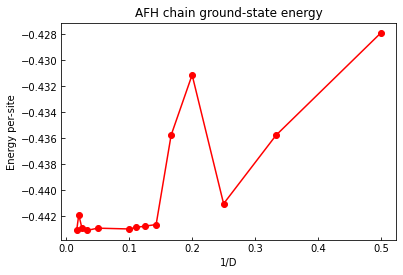

In [21]:
fig, axes = plt.subplots(2, 2, figsize=(20, 14))
axes[0, 0].plot(1 / np.array(d_list_chain), chain_energy, '-o', color='tab:red')
axes[0, 0].set_xlabel(r'1/D')
axes[0, 0].set_ylabel(r'$\epsilon_0$')
axes[0, 0].set_title('AFH chain ground-state energy per-site')
axes[0, 0].tick_params(direction='in', axis='both')

axes[1, 0].plot(1 / np.array(d_list_peps), peps_energy, '-o', color='tab:green')
axes[1, 0].set_xlabel(r'1/D')
axes[1, 0].set_ylabel(r'$\epsilon_0$')
axes[1, 0].set_title('AFH PEPS ground-state energy per-site')
axes[1, 0].tick_params(direction='in', axis='both')

axes[0, 1].plot(1 / np.array(d_list_star), star_energy, '-o', color='tab:blue')
axes[0, 1].set_xlabel(r'1/D')
axes[0, 1].set_ylabel(r'$\epsilon_0$')
axes[0, 1].set_title(r'AFH ($J_e=1, J_t=0.05$) Star ground-state energy per-site')
axes[0, 1].tick_params(direction='in', axis='both')

axes[1, 1].plot(1 / np.array(d_list_cube), cube_energy, '-o', color='tab:orange')
axes[1, 1].set_xlabel(r'1/D')
axes[1, 1].set_ylabel(r'$\epsilon_0$')
axes[1, 1].set_title('AFH Cube ground-state energy per-site')
axes[1, 1].tick_params(direction='in', axis='both')
